# **The Nagel-Schrekenberg Traffic Model**

##### *Have you ever been stuck in traffic and thought to yourself, "If other people drove better, I wouldn't be here?" Kai Nagel and Michael Schreckenberg, two German physicists, made a fundamental breakthrough in understanding and modeling the emergence of traffic jams. As it turns out, traffic jams are not random occurrences; rather, they are highly predictable.*

![Trafficurl](https://alg.manifoldapp.org/api/proxy/ingestion_sources/c40c5285-d279-4085-ac37-fc4eeb9c4b62)
*Simulation of the Nagel-Schrekenberg traffic model at density 0.35 and p=0.3. Colors represent vehicle speed | Vivek Skanda*

Cars are simulated as discrete objects on a grid of cells in the [Nagel-Schrekenberg model](https://jp1.journaldephysique.org/articles/jp1/abs/1992/12/jp1v2p2221/jp1v2p2221.html). Vehicle positions are updated at each time step based on four simple rules:

1. **Speed limit:** All vehicles travel at speeds ranging from 0 to the speed limit. The speed limit is '5' in the original paper, so vehicles drive between 0 and 5.
2. **Acceleration to speed limit:** Vehicle speeds are updated at each time step to their current speed +1, as long as it is less than the speed limit.
3. **Slowing down if too close to the vehicle in front:** If a vehicle is about to collide with the vehicle in front at its current speed, it is slowed down to avoid a collision. For example, suppose a vehicle is three cells away from the vehicle in front of it at time t, and its current velocity is four. The vehicle's velocity is reduced to 2 so that it moves only 2 cells from time t to time t+1, avoiding collisions with the vehicle in front (not cause an accident).
4. **Random slowing:** A vehicle reduces its velocity by one at each time step with a certain probability, p. If p=0.5, each vehicle has a 50% chance of slowing down at each timestep. If the velocity is 3 in this case, it is reduced to 2 50% of the time. This represents the human flaw that causes traffic congestion.

Vehicles move to the right in the video, and jams form (patches of red vehicles) with bursts of fast moving vehicles (green). This captures traffic jams that come and go. A density of 0.35 indicates that vehicles occupy 35% of the cells. If you have a 100-cell grid, 35 of them are occupied by vehicles.

## **Traffic Jams can be Visualized using Space-Time Plots.**

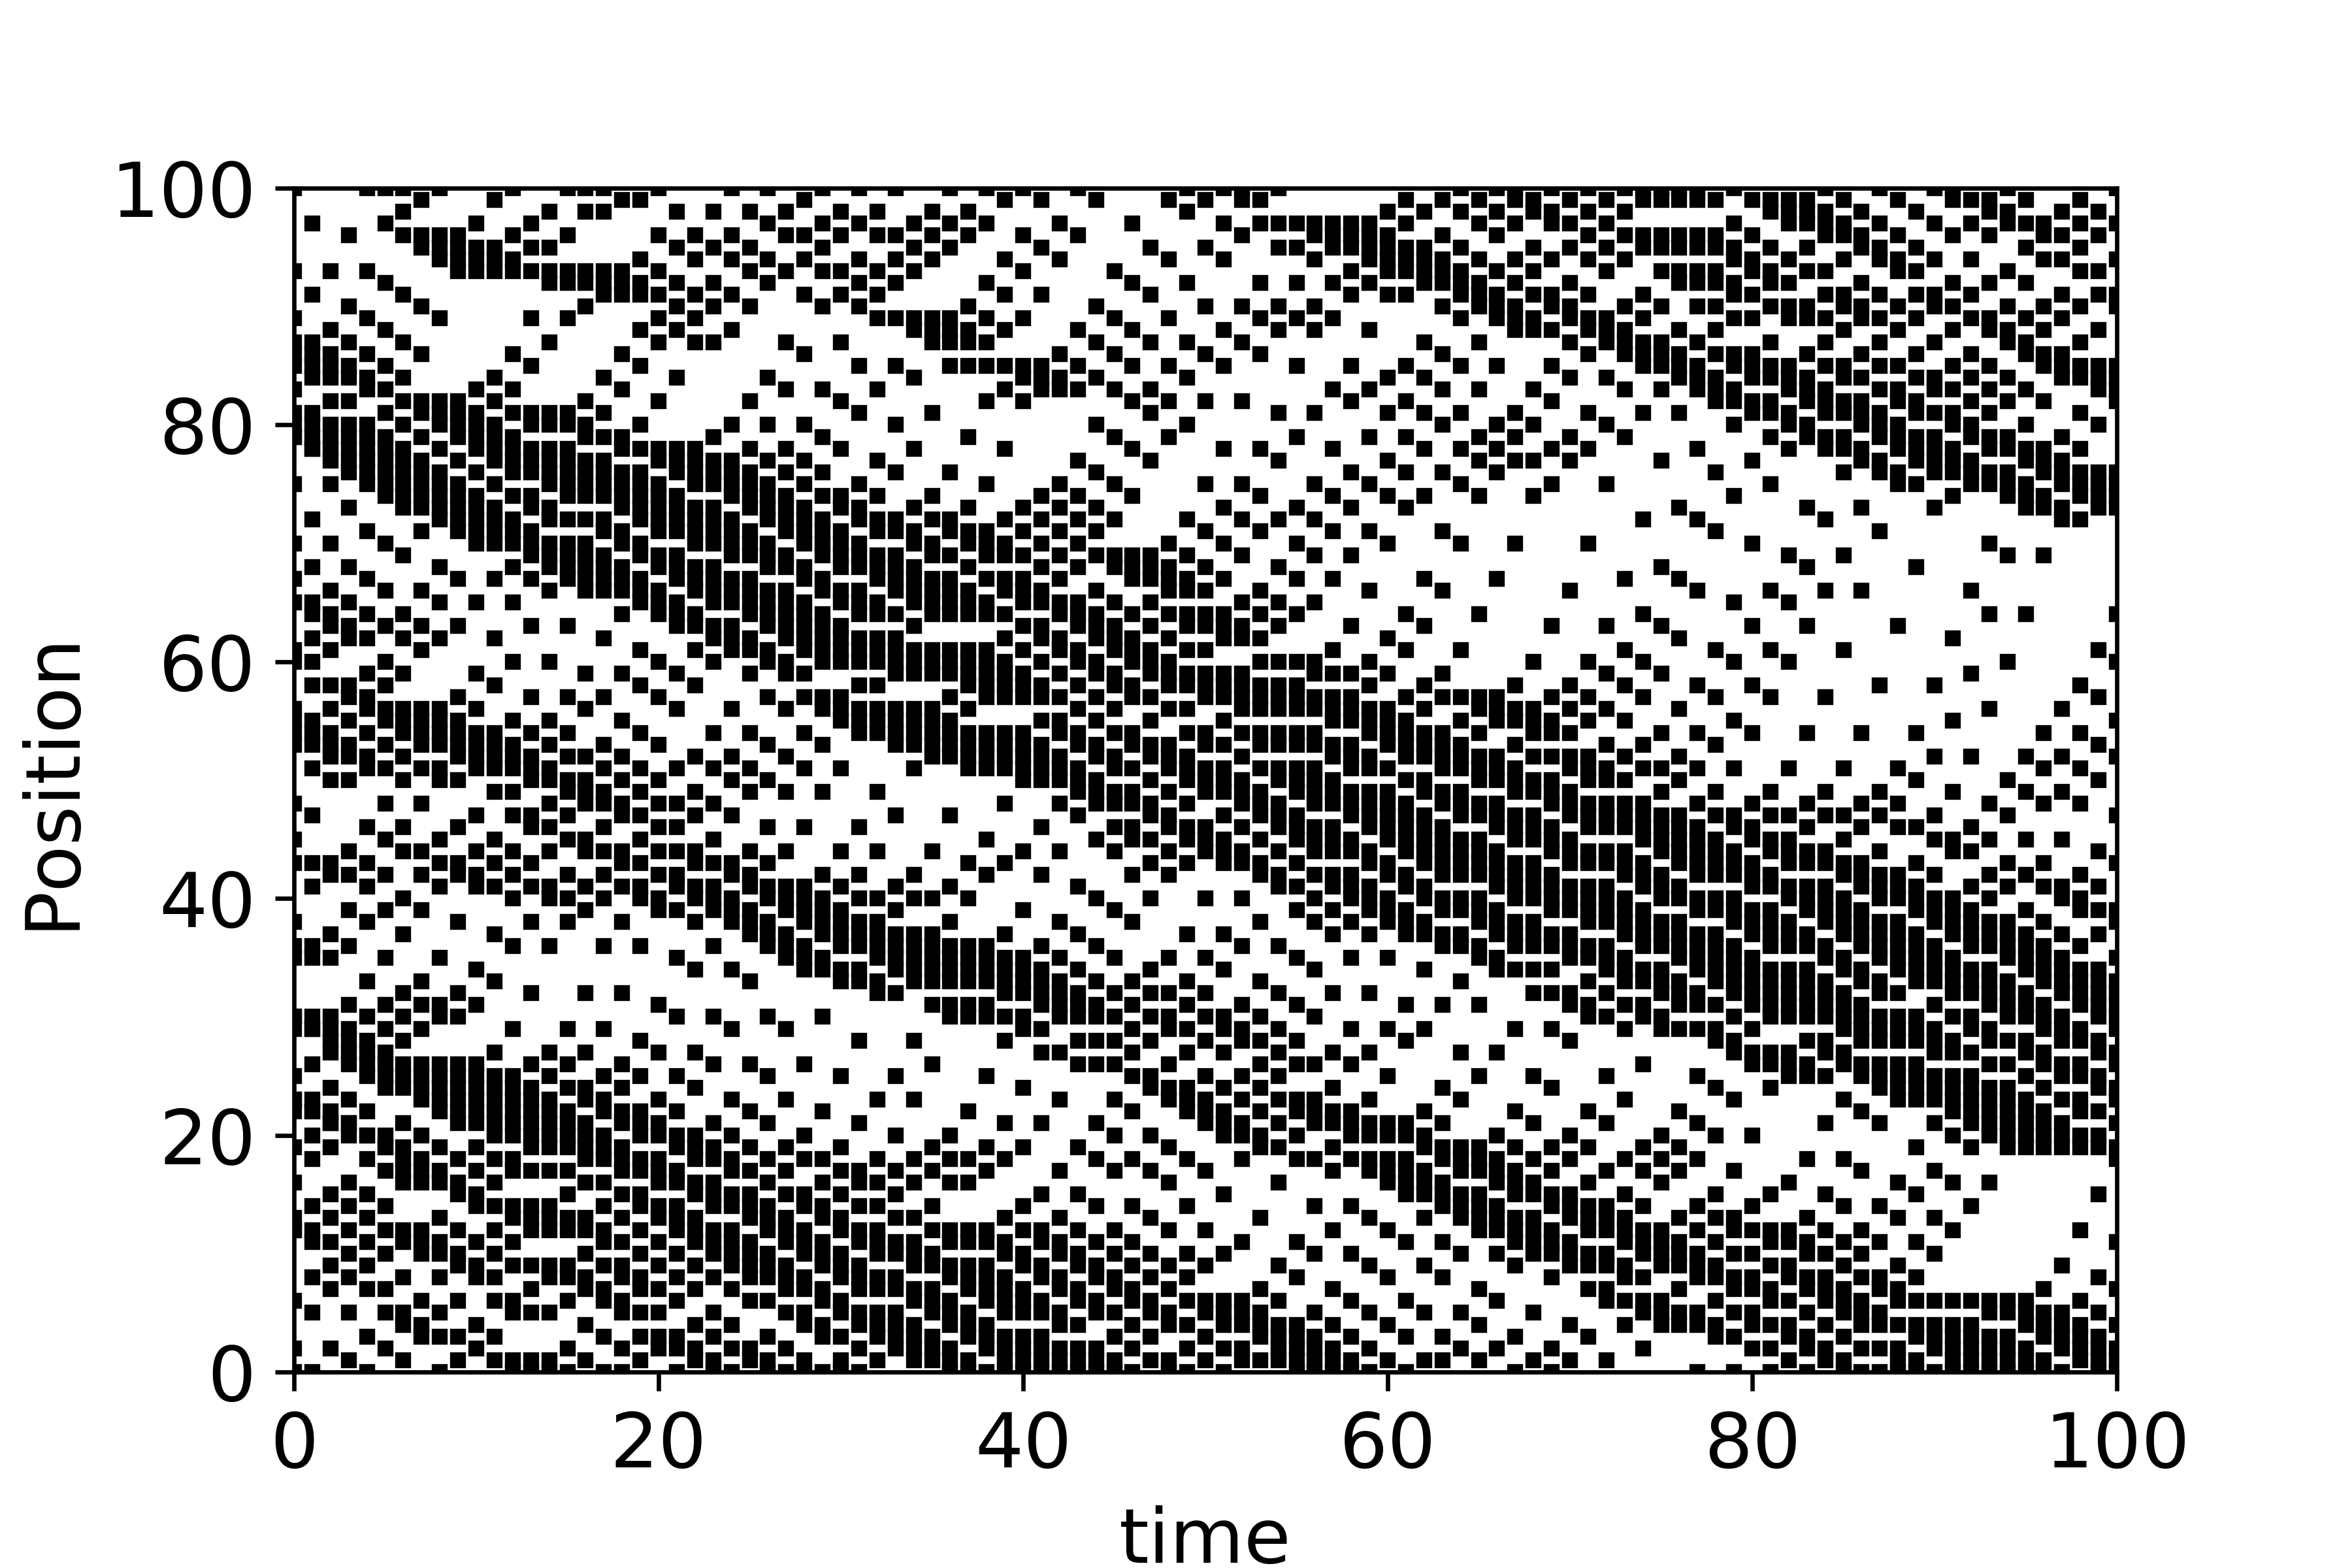
*Skanda Vivek's space-time diagram for the Nagel-Schrekenberg model with density 0.35 and p=0.3*

A space-time plot is a common way to depict traffic flow. Vehicle density waves are depicted by dark black regions. The negative slope indicates that a traffic jam that begins upstream at time t=0 propagates downstream at later times. At t=100, for example, the jam starting at position 80 affects position 30.

## **What Causes Traffic Congestion?**

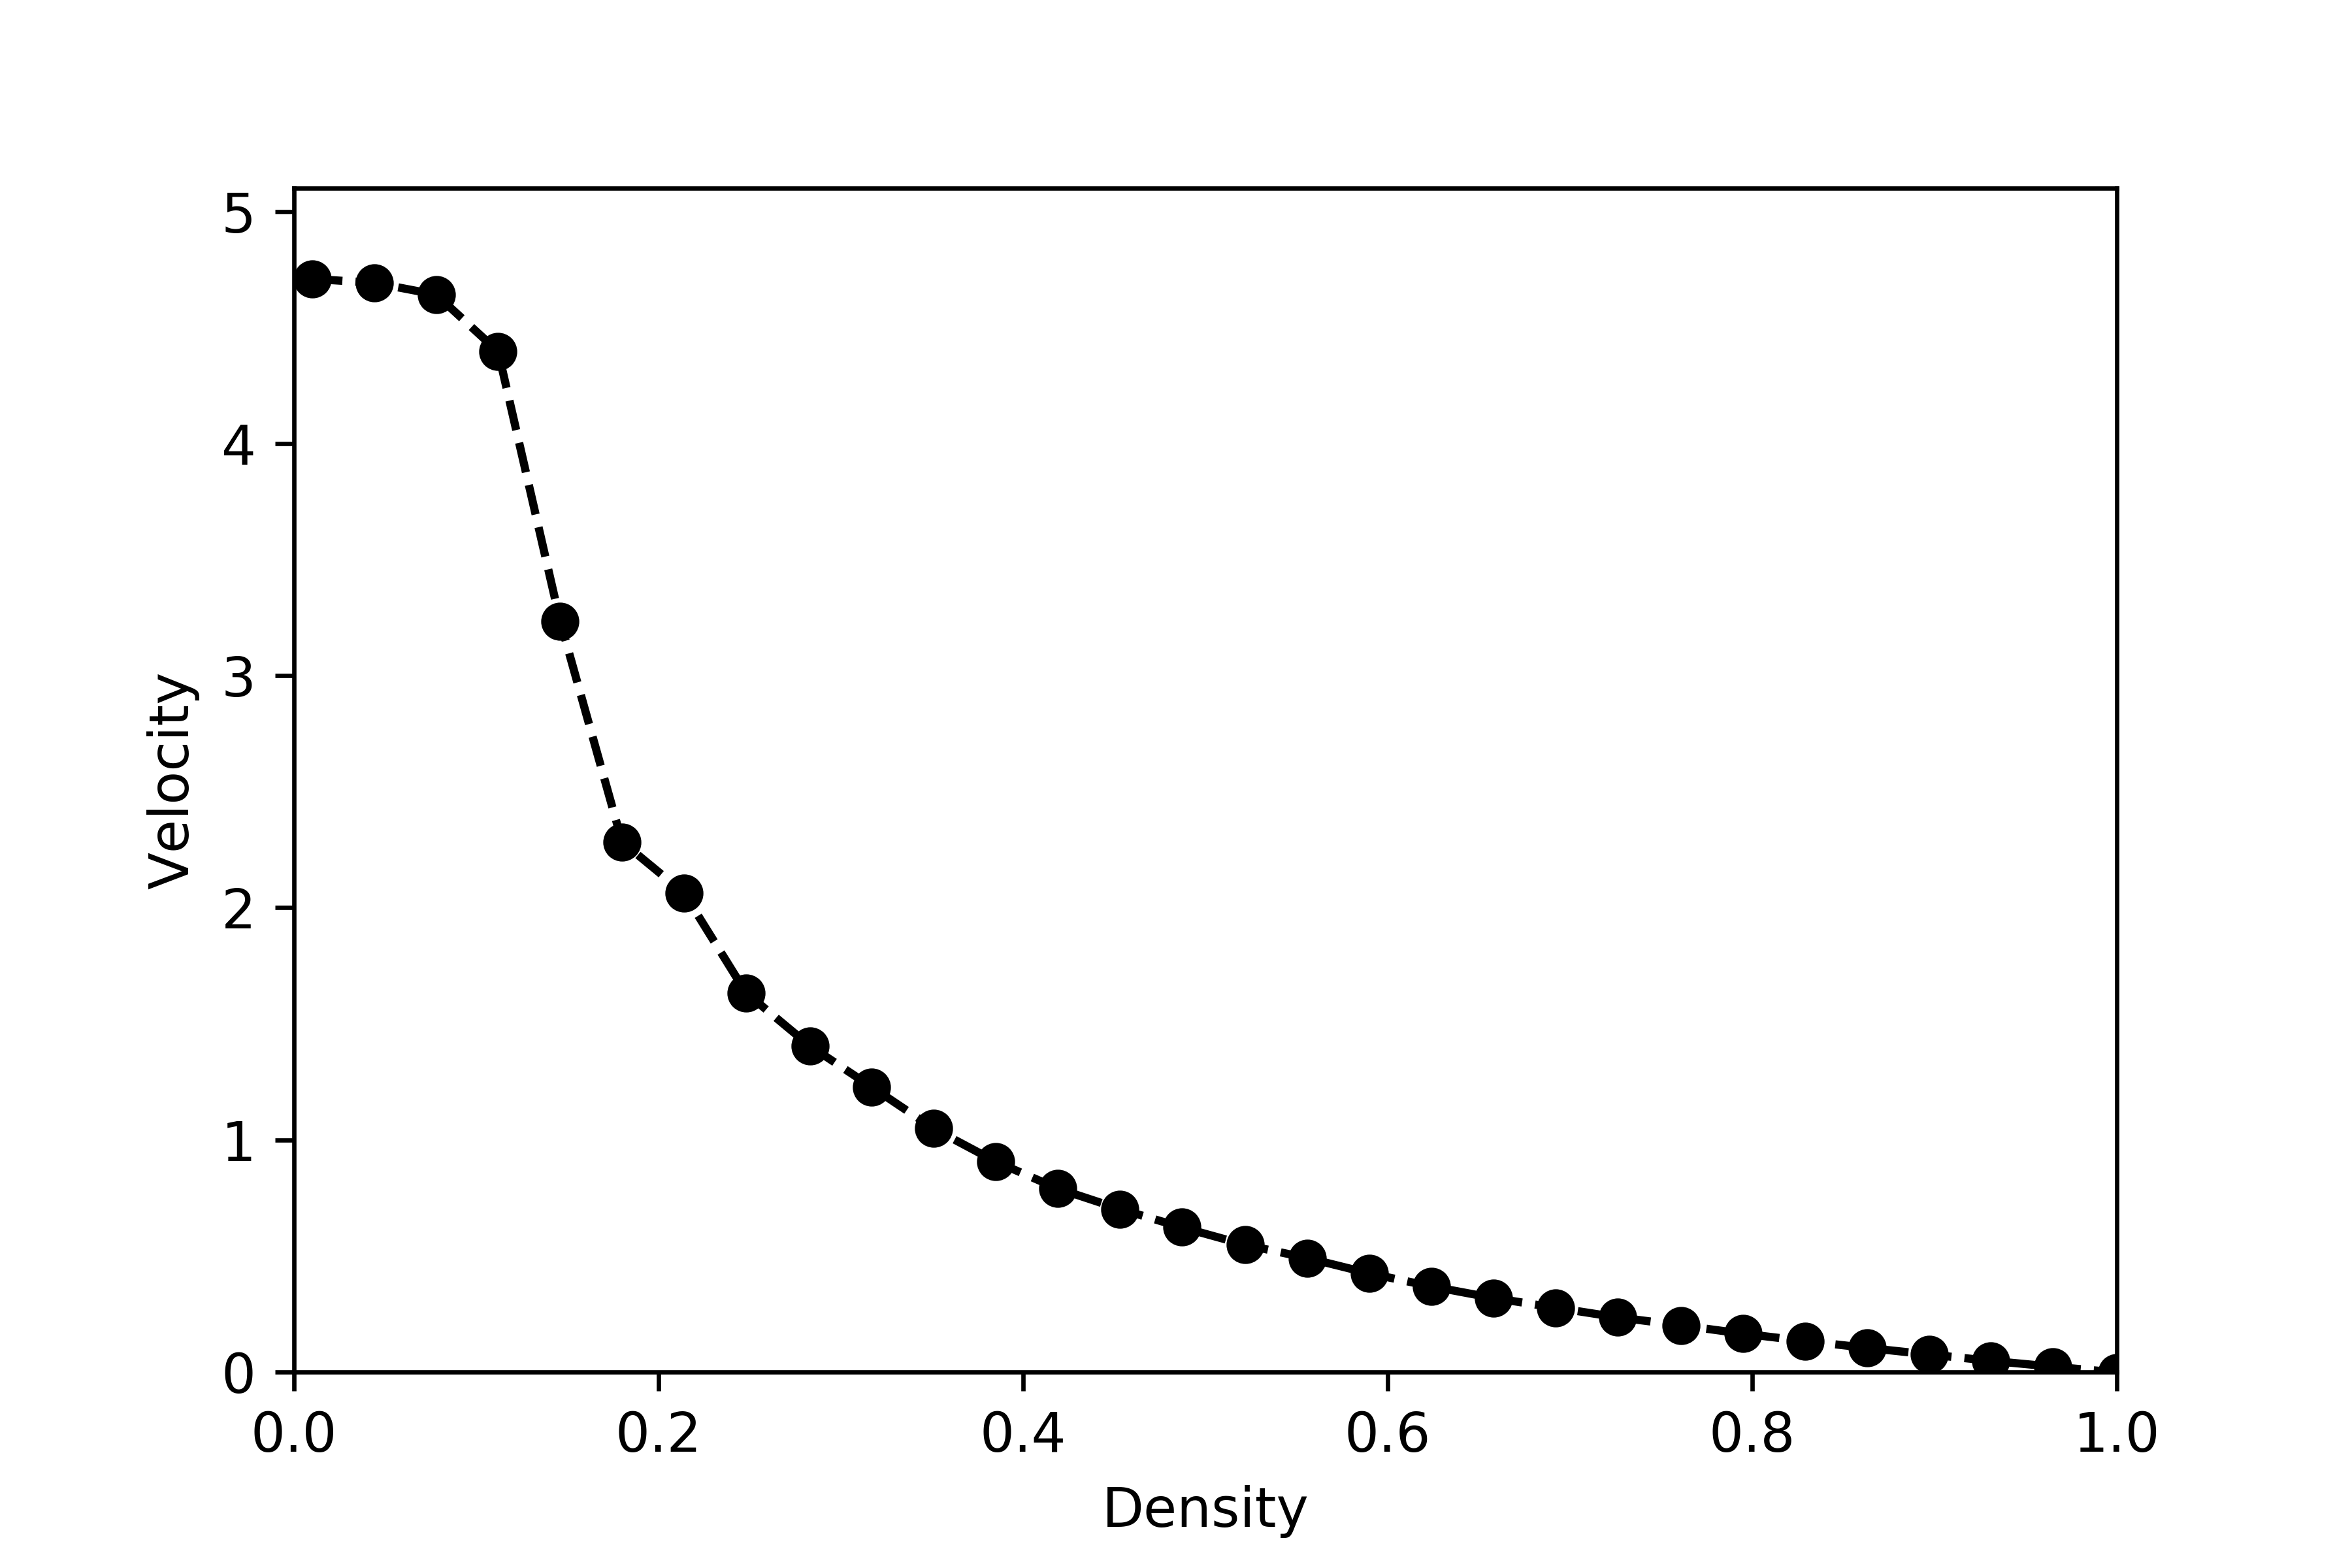
*Velocity vs Density for the Nagel-Schrekenberg model | Skanda Vivek*

The velocity decreases as the number of vehicles increases. There is a sharp decrease in velocity above around density of 0.2. This is because at density of 0.2, the average spacing between each vehicle is 1/0.2=5. Why is the number 5 so well-known? Because 5 is the fastest possible speed! As a result, above that density, vehicles begin to feel the effects of the vehicle in front of them and must slow down in response.

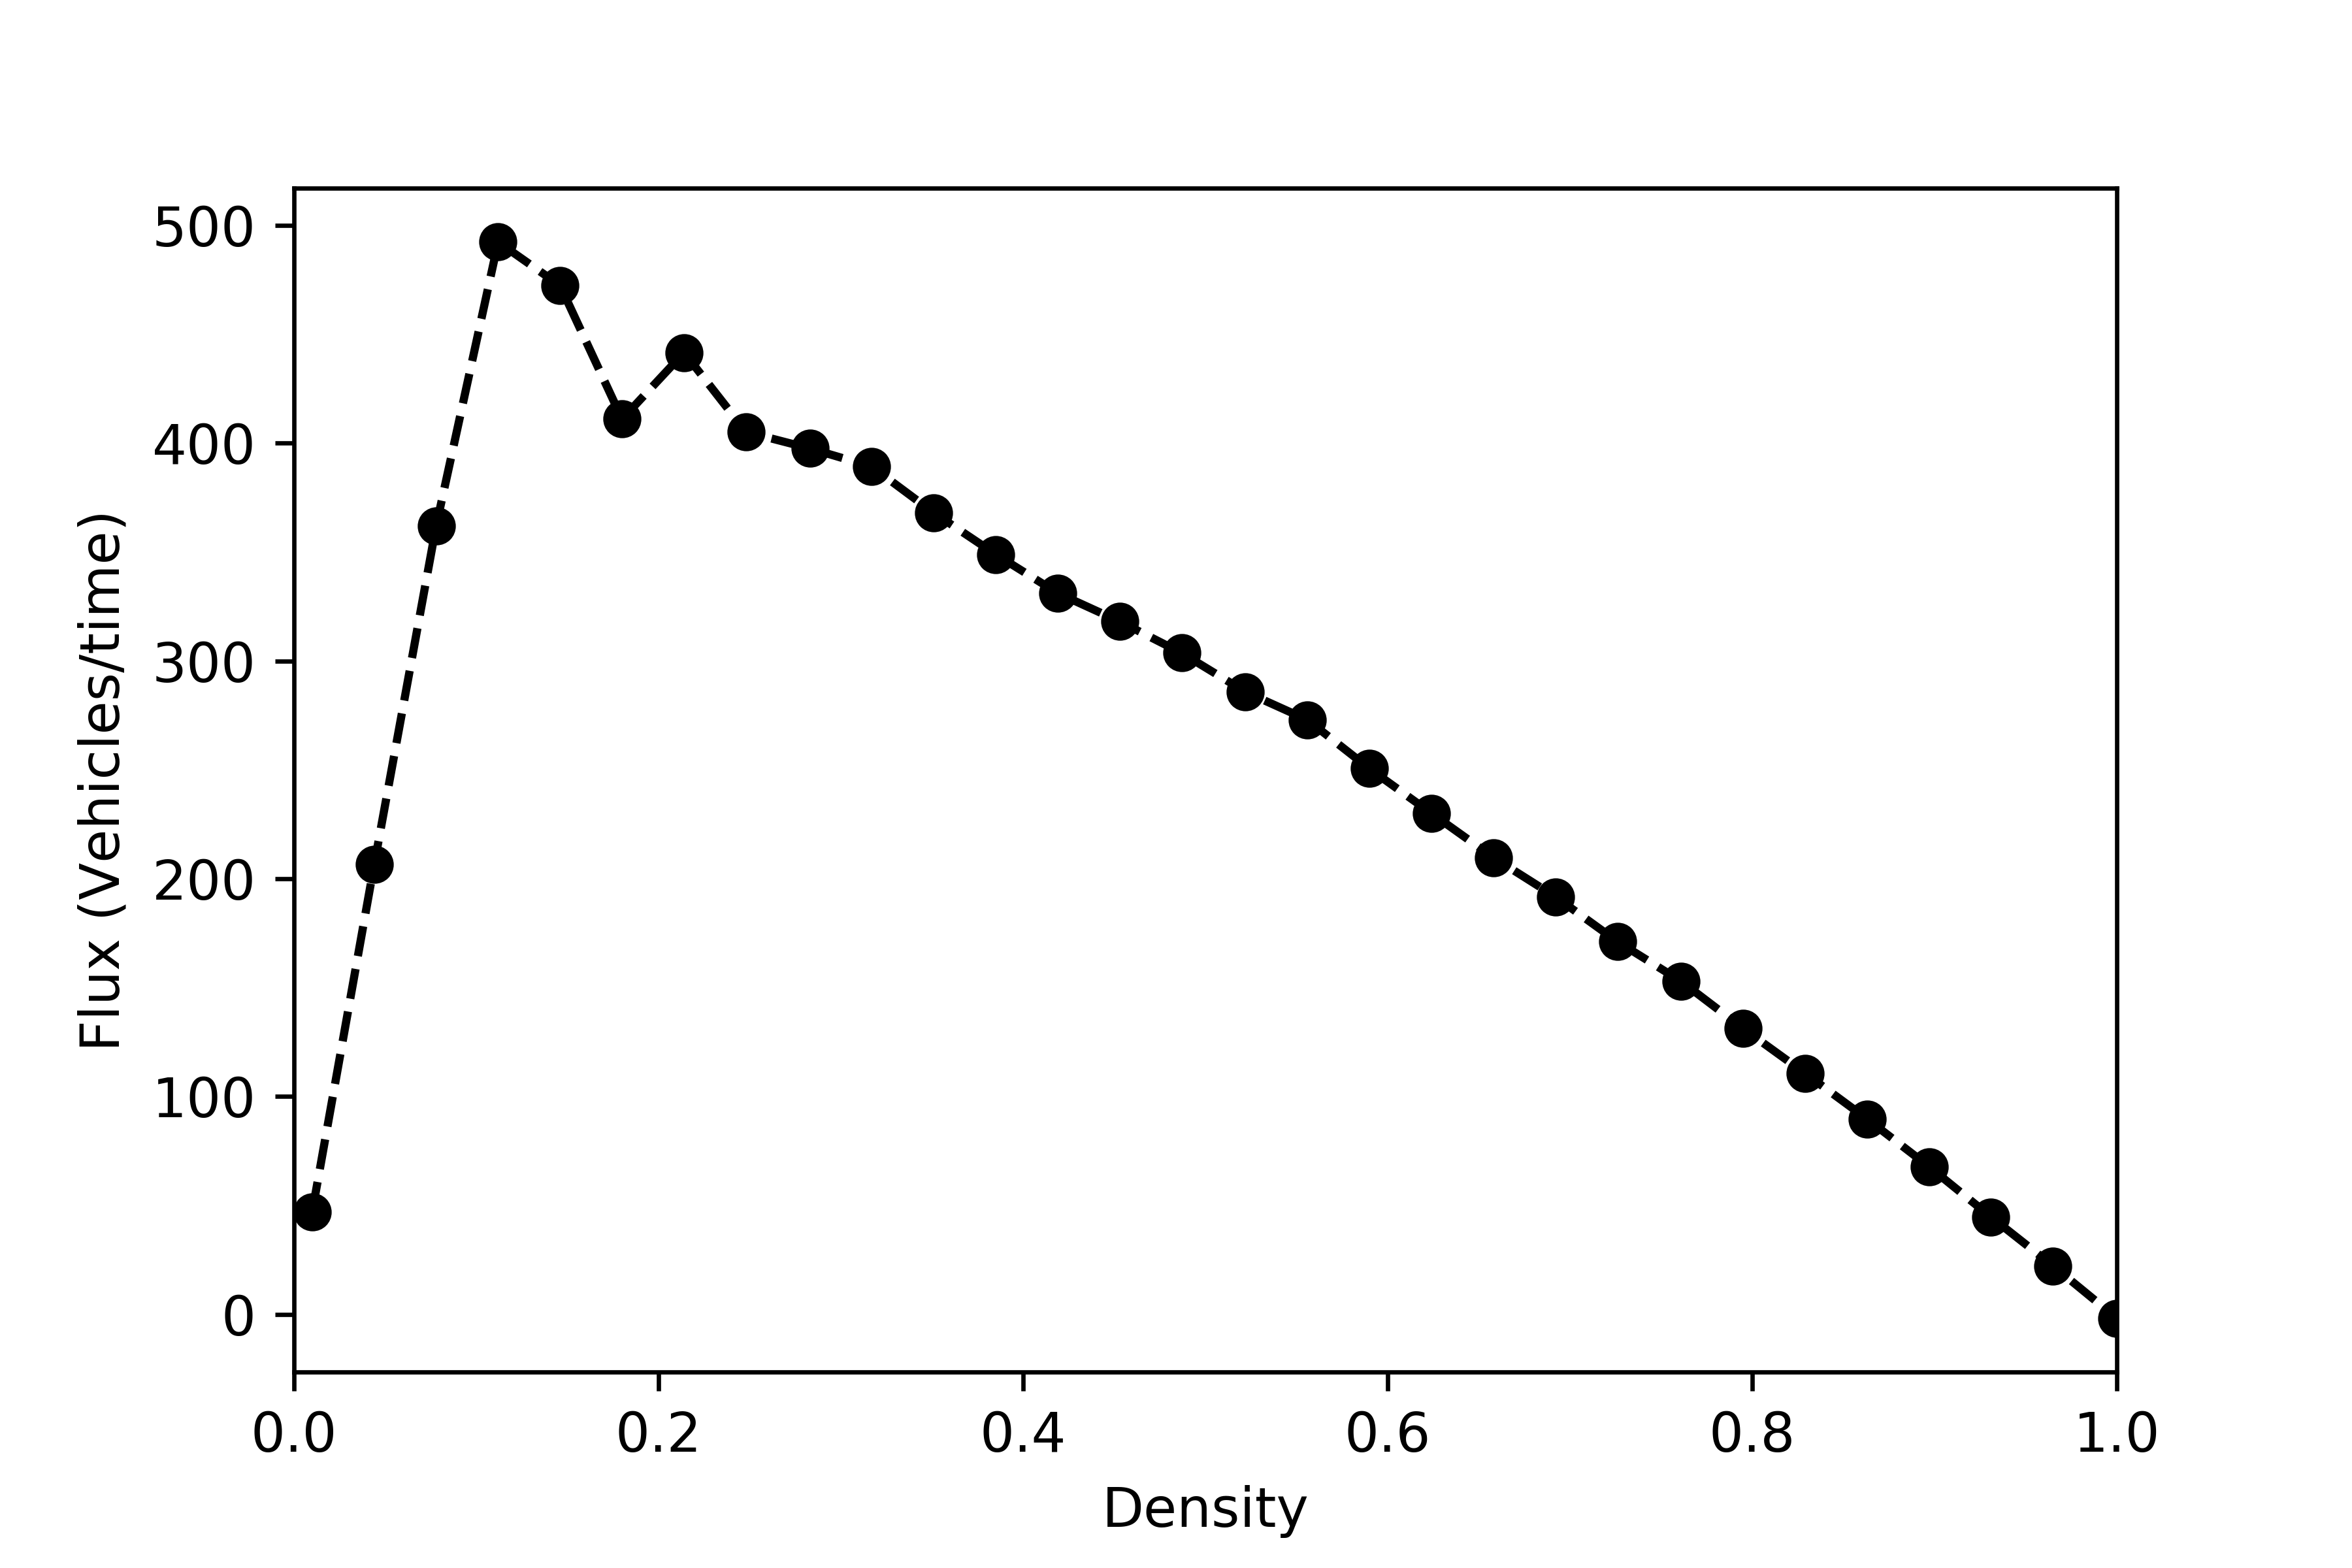
*Flux versus density in the Nagel-Schrekenberg model with p=0.3 | Skanda Vivek*

Another useful tool for determining the onset of traffic jams is the flux density plot. Flux is the number of vehicles that pass through a given point in a given amount of time (vehicle throughput). **It is essentially the sum of the velocities of all vehicles within a given distance.** Because every vehicle is basically traveling at the speed limit at low densities, flux increases linearly with density. However, at higher densities, vehicles cannot travel at the speed limit, and at a certain point (here density = 0.2), the effect of a higher density is offset by each vehicle traveling at a slower speed, resulting in a lower flux. 
> Vehicle throughput is maximized when vehicle density (number of vehicles per distance) is optimal.

## **Congestion in the Real World**

The Nagel-Schrekenberg model excels in that it effectively captures important traffic characteristics. But how do these plots actually play out in the world? And how do they correspond to actual velocities and distances? On June 15, 2005, researchers for the [NGSIM program](https://www.fhwa.dot.gov/publications/research/operations/07030/index.cfm) gathered thorough vehicle trajectory data on the Hollywood Freeway, popularly known as southbound US 101, in Los Angeles.

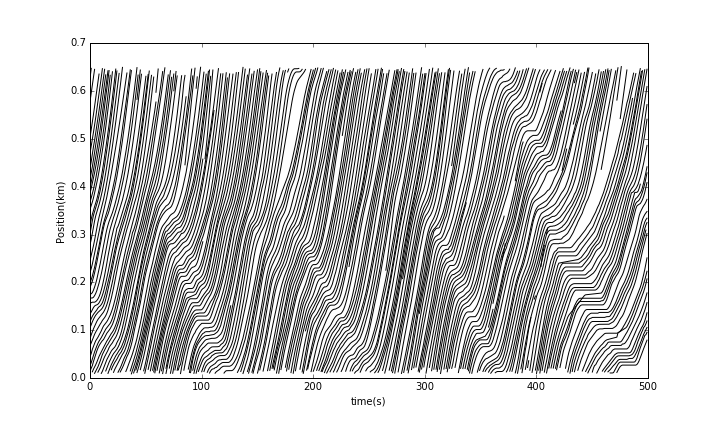 <br>
*Skanda Vivek created this space-time plot from vehicle trajectories as part of the NGSIM project.*

The different waves linked to traffic congestion are depicted in the space-time graphs. A jam that forms at 0.5 km upstream and subsequently moves downstream to 0.1 km after about 100 seconds is similar to the Nagel-Schrekenberg model.

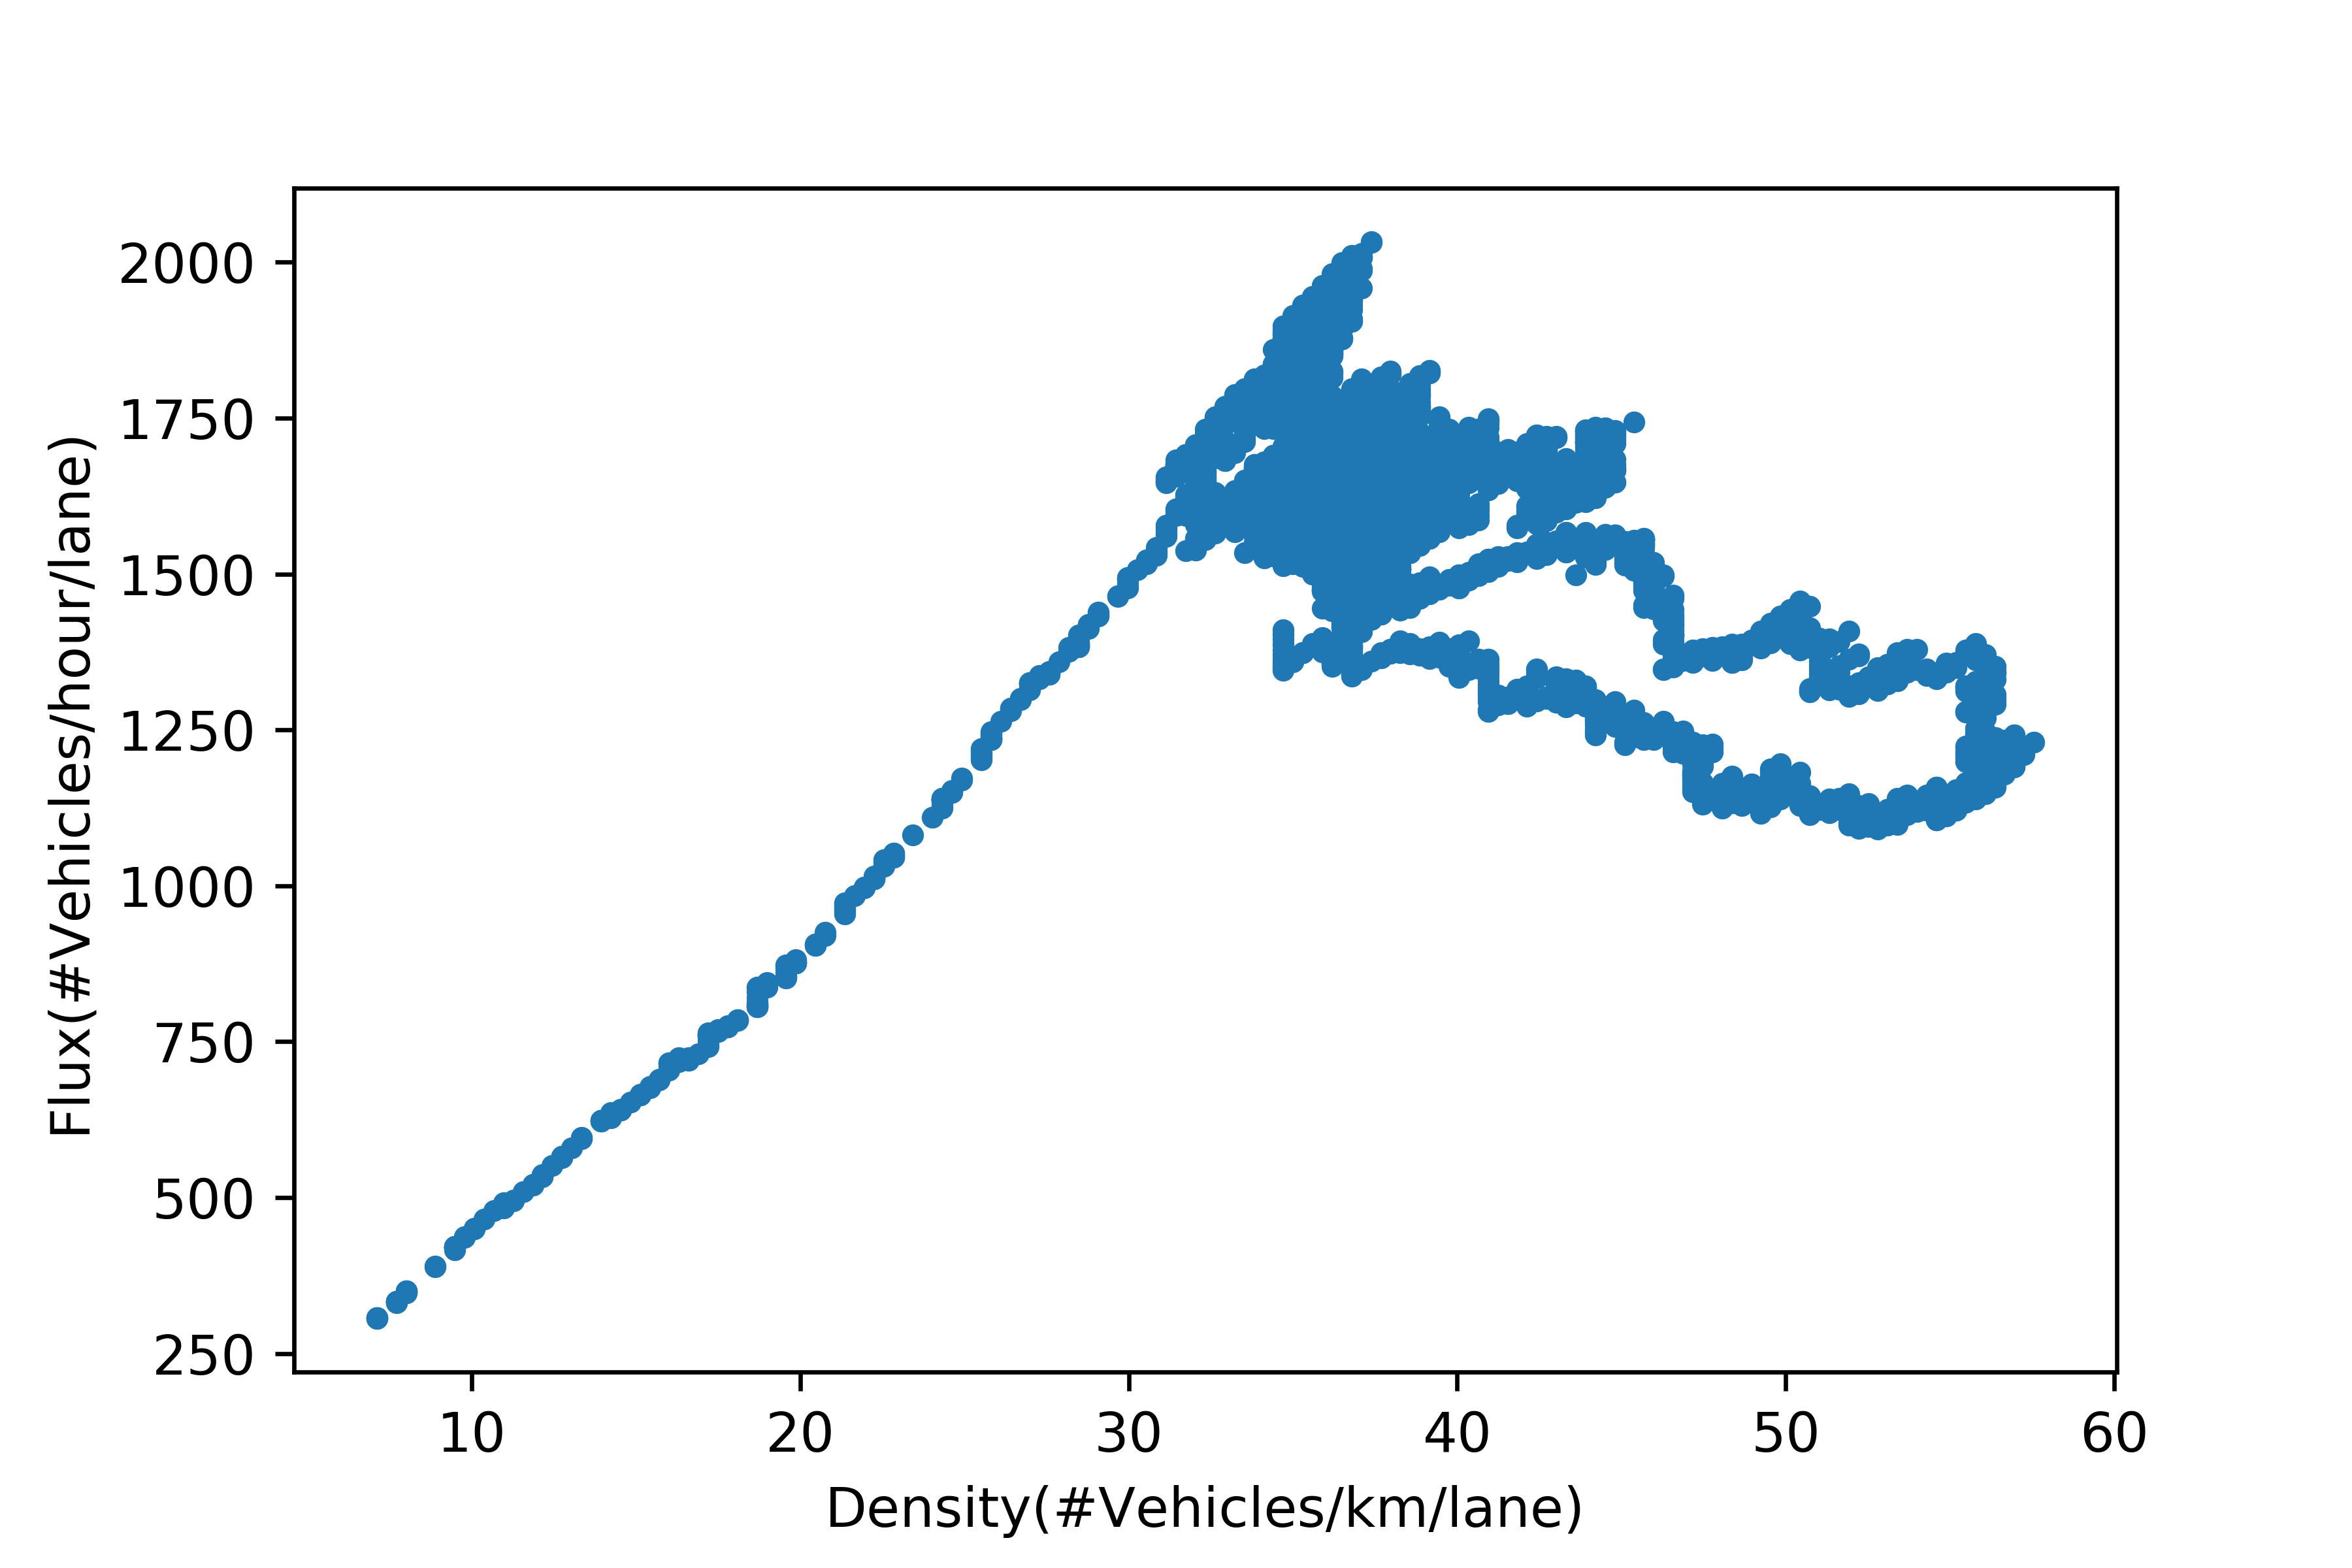
*Data from vehicle trajectories collected as part of the NGSIM project | Skanda Vivek's plot*

The flux-density plot created using vehicle trajectory data resembles the Nagel-Schrekenberg charts quite a bit. The units, however, are different. Flux begins to decrease in the real world at a density of about 30 vehicles per km per lane. Why is that moment unique? A quick calculation on the fly reveals that 30 vehicles/km/lane equals, on average, 1000/30=33 m between each car. A car moving at 65 mph (30 m/s) has 33/30 seconds, or almost one second, to catch up to the car in front. **You have a split second to respond if the person in front were to abruptly halt for any reason.**

> When there are 30 cars per km in a lane, it takes drivers 1 second to react to the car in front, which is moving at 65 mph (or 29 m/s) at that point.

Finally, traffic jams are caused by inexperienced human drivers. The most serious of these are the proclivity to drive noisily - sometimes someone stops for no apparent reason or does not drive optimally. The other reason is that we have a limited reaction time, which causes us to lag behind the driver in front of us (usually one second away). When there are too many cars on the road, we get too close to the vehicle in front of us and don't drive as we would on a clear stretch of highway.

---
## **Simulating Traffic Jam using pyglet Library** <br>
### **Import Required Libraries**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

import pyglet
import time
from random import randint, choice
from pyglet.graphics import *


### **Parameter Initialization**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

roadlength = 100                                          #number of tiles on the road
maxcars = 20                                              #maximum cars
breaktime = 0.1                                           #number of seconds to wait after each cycle
slowprob = 0.3                                            #probability of velocity reduction
config = gl.Config(double_buffer=True)
window = pyglet.window.Window(1280, 100, config = config) #window size
w,h = window.get_size()
tw, th = w/roadlength, h
road = []


### **Color Initiation**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

class Color(object):
    ACC = (0, 255.0, 0)      #green
    DRIVE = (0, 0, 255.0)    #blue
    SLOW = (255.0, 255.0, 0) #yellow
    BREAK = (255.0, 0, 0)    #red
    

### **Car Initiation**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

class Car(object):
    cars = []
    def __init__(   self, pos = 0, cur_speed = 0, max_speed = 5,
                    color = Color.ACC):
        self.pos = pos
        self.cur_speed = cur_speed
        self.max_speed = max_speed
        self.color = Color.ACC
        self.moved = False
        self.id = len(cars)
        Car.cars.append(self)

    def __repr__(self):
        return "Car"+str(self.id)
    

### **Velocity Reduction Function**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

class Slow(Car):
    def __init__(self):
        super(Slow, self).__init__(cur_speed = 0, max_speed = 5)
        

### **Car Movement Function**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

def run(bloat):
    for car in Car.cars:
        car.moved = False
    cycle()
    if road[0] is None and len(Car.cars) < maxcars:
        road[0] = choice([Car, Slow])()
    time.sleep(breaktime)
    

### **Cycle Function**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

def cycle():
    for car in road:
        if car is None or car.moved:
            continue
        else:
            car.moved = True

        if car.cur_speed < car.max_speed:
            car.cur_speed += 1
            car.color = Color.ACC
        else:
            car.color = Color.DRIVE

        upcoming = enumerate(road[car.pos+1:car.pos+car.cur_speed+1])
        for d, field in upcoming:
            if field is not None:
                car.cur_speed = d
                car.color = Color.BREAK

        if car.cur_speed > 0 and randint(0,100) < slowprob:
            car.cur_speed -= 1
            car.color = Color.SLOW

        road[car.pos] = None
        car.pos += car.cur_speed
        if car.pos > len(road)-1:
            Car.cars.remove(car)
        else:
            road[car.pos] = car
            

### **Main Algorithm**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

@window.event
def on_draw():
    gl.glClear(GL_COLOR_BUFFER_BIT)
    batch = Batch()
    for i, c in enumerate(road):
        if c is None:
            continue
        p1 = tw*i, 0
        p2 = p1[0]+tw, p1[1]
        p3 = p1[0]+tw, p1[1]+th
        p4 = p1[0], p1[1]+th

        vertex_list = batch.add(
            4, pyglet.gl.GL_QUADS, None,
            ('v2f', (p1+p2+p3+p4)),
            ('c3f', (c.color+c.color+c.color+c.color))
        )
    batch.draw()
        

### **Traffic Simulation using pyglet**

In [ ]:
# Copyright 2011, Barthimaeus <barthimaeus@web.de>

if __name__ == "__main__":
    cars = [Car, Slow]
    for i in range(roadlength):
        road.append(None)

    pyglet.clock.schedule_interval(run, 1/10.0)
    pyglet.app.run()
    

#### **Result**
parameters $M$ = 100, $p$ = 0.3, $v_{0}$ = 0, number of vehicles $N$ = 20, $v_{max}$ = 5

![CarAnimationPygletLocal1](car_animation_pyglet_1.gif "animation_1")

parameters $M$ = 300, $p$ = 33, $v_{0}$ = 0, number of vehicles $N$ = 30, $v_{max}$ = 6

![CarAnimationPygletLocal2](car_animation_pyglet_2.gif "animation_2")

---

# **Case Studies** - *Simulation for Traffic Flow*

## **Problem Statement**
The government plans to build a highway congestion detection system that can provide the location of congestion points based on the density of vehicles in the location units. For this purpose, the research team involved tried to create a system that can simulate the flow of vehicles on the highway. The initial assumptions for the vehicle path have also been agreed, namely:
1. All vehicles are cars.
2. The vehicle lane has only one cyclical path as shown in the figure.
3. Driver behavior is regulated/restricted as follows:
> **Rule-1.** Vehicles can only move forward, and for safety reasons must not exceed a certain speed $v_{max}$. <br>
> **Rule-2.** The driver pays attention to the distance from the car in front to avoid a collision. <br>
> **Rule-3.** The driver's tendency to apply the brakes causing the car to decelerate following certain opportunities.

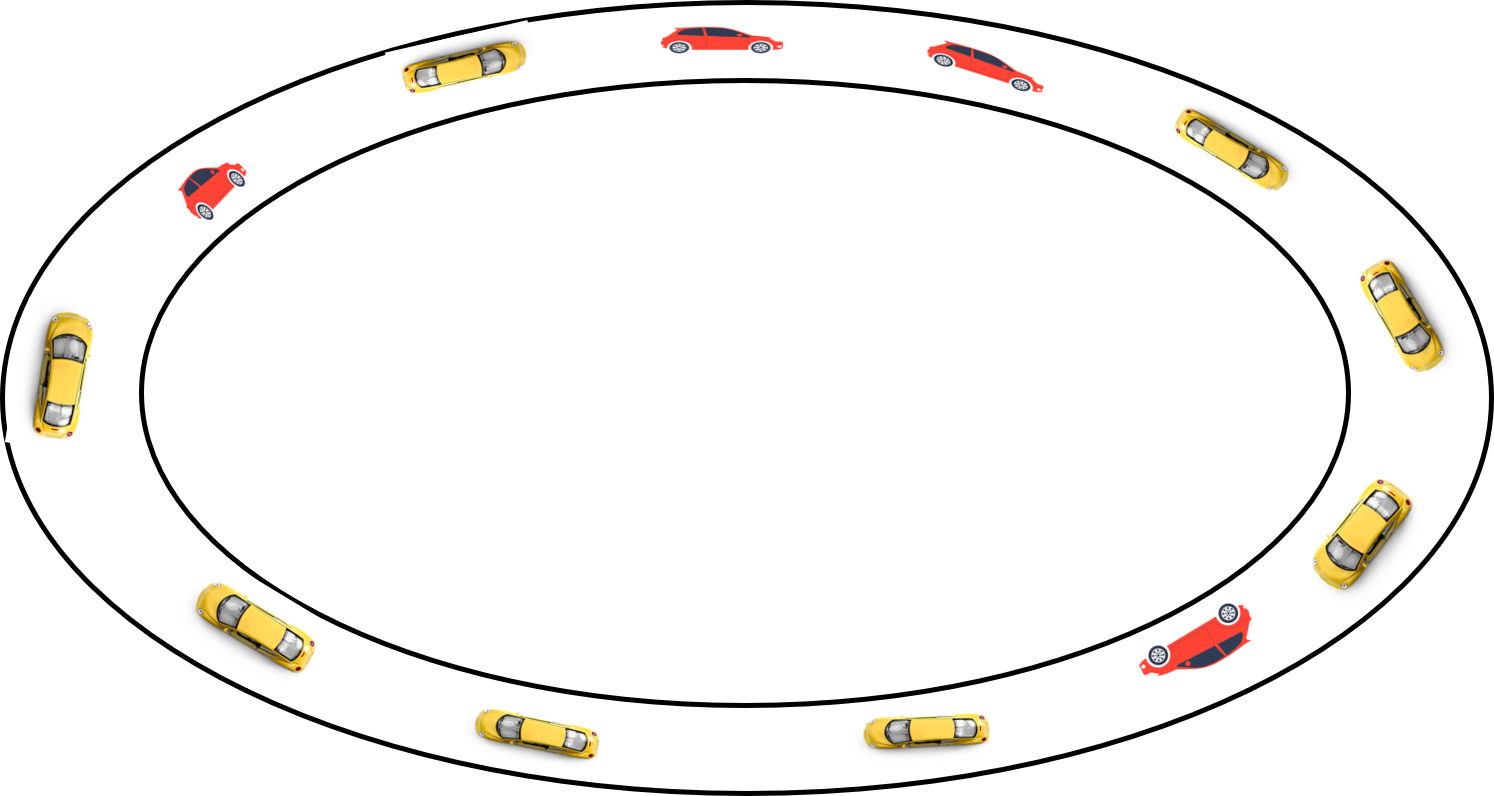

**Think about how to simulate the system/implementation of the driving rules above.**

Suppose by first simplifying the system rules, namely:

Because the path is cyclical, then after one lap, the car will return to the starting point. See the illustration in Figure below. Imagine a rubber band that is cut off, so that it can be stretched into a horizontal line, where the end points used to be together. Then we partition the horizontal path into $M$ subintervals, so that the position of the car in the cyclical path is $x_{1}, x_{2},···, x_{M}$, and $x_{kM+1} = x_{1}$, for $k = 1, 2,···$ is the number of rounds.

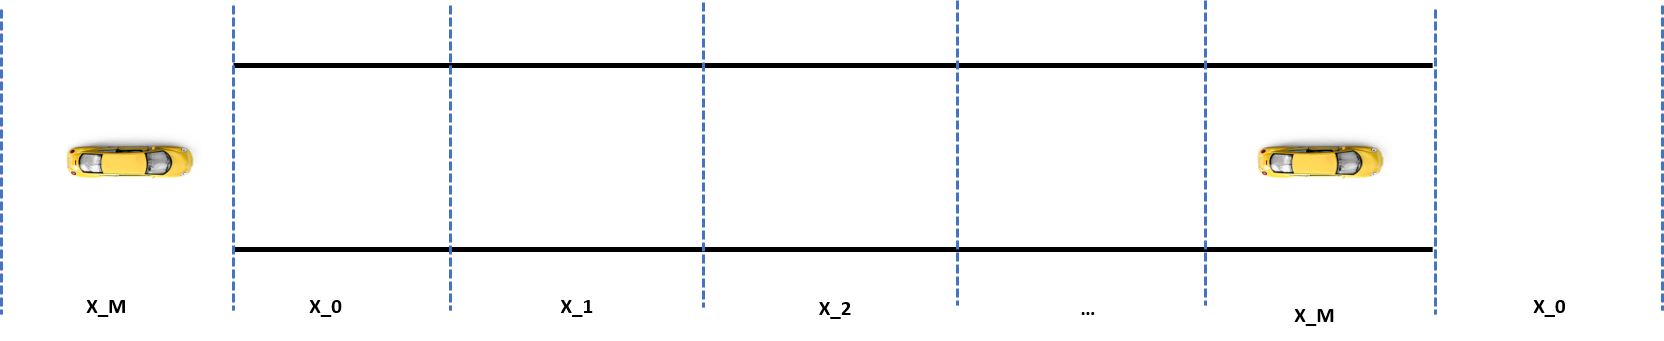
*Illustration of a cyclical path stretched into a horizontal path. After passing the $x_{M}$ position, the rider will return to the $x_{1}$ position.*

We first simplify the system by modeling discrete $x$ and $t$ positions. $x \in x_{1}, x_{2},···, x_{M} = M$ and discrete time $t \in N_{0} := [0, 1, 2,···]$. Driver behavior is simplified to the following:

> a. **Simplification of Rule-1:** Add 1 unit of speed unit to the speed of each car per one unit of time, and the speed of each car must not exceed the allowable speed limit $(v_{max})$. This means that $v(t + 1) = v(t) + 1 \le v_{max}$. <br>
> b. **Simplification of Rule-2:** Suppose the safe distance between two cars side by side is $d$, then the speed of each car must satisfy $v \le d - 1.$ <br>
> c. **Simplification of Rule-3:** The driver has a tendency to brake with a probability of $p$, which causes the car to decelerate by 1 unit of speed, so that if you hit the brake the speed becomes $v(t + 1) = v(t) - 1 \ge 0$ (because the car is not allowed to reverse). <br>

In other words, through this simplification, each vehicle will experience the following speed and position updates:
<br>**speed updates:**<br>
$$
v(t+1) = \left\{
    \begin{array}\\
        max\{min\{v(t)+1, v_{max}, d-1\}-1,0\} & \mbox{with probability p} \\
        min\{v(t)+1, v_{max}, d-1\} & \mbox{with probability 1 - p }
    \end{array}
\right.
$$

then **update the position:**<br>
$$
x(t+1) = \left\{
    \begin{array}\\
        x(t)+v(t+1) & \mbox{If } \ x(t)+v(t+1)\le M \\
        x(t)+v(t+1)-M-1 & \mbox{If } \ x(t)+v(t+1)\gt M
    \end{array}
\right.
$$

The above example does not limit you, if you can think of a more realistic and possible way to do it. Hint: The problem of detecting traffic flow as described above, you can dig deeper from sources on the internet with the keywords: Nagel-Schreckenberg Model.

**From the above model do the following:**
1. Make a simulation for the system with fixed parameters $M$ = 100, $p$ = 0.3, $v_{0}$ = 0, $d$ = 2, number of vehicles $N$ = 20, $t_{max}$ = 1000, $v_{max}$ = 5
2. From the simulation determine and explain:
    -  Describe what happens after the system runs for $t_{max}$.
    -  Density per unit time, vehicles in the interval $[x80, x90]$.
    -  Maximum density per unit time, of vehicles at each interval with a length of 5 position units.
    -  Average time the car returns to its starting position.

---
## **Let's Solve the first Question with the Turtle Library** <br>
### **Import Required Libraries**

In [1]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

import math
import numpy as np
import random as rd
import turtle
from tkinter import PhotoImage


### **Parameter Initialization**

In [2]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

M = 100           #path length
p = 0.3           #probability
v0 = 0            #initial speed
N = 20            #number of vehicles
dt = 1            #distance between time
t = 0             #start time
t_max = 1000      #max time
v_max = 5         #max speed

car_list = []     #list car
coordinates = []  #coordinates of the start of the car
v = []            #list the speed of each car per second
v = [v0]*N        #initiation v0 per car = 0
v_car = []        #car density in the interval x80 & x90
t_car = []        #time from each to return to original position
t_car = [v0]*N
n_Round = []      #all cars pass the initial coordinates
n_Round = [v0]*N
interval = [0]*20

turtle.Screen().setup(820,86,0,0)
turtle.Screen().delay(1)
turtle.Screen().bgpic('road.gif')

image_small = PhotoImage(file="car.gif").subsample(15, 15)
turtle.Screen().addshape("car", turtle.Shape("image", image_small))


### **Car Distance Checking Function**

In [3]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

def car_distance(car):
    if(car == N-1):
        if(car_list[car].xcor() > car_list[0].xcor()):
            distance = abs(M - (car_list[car].xcor() - car_list[0].xcor()))
        else: 
            distance = abs(car_list[0].xcor() - car_list[car].xcor())
    else:
        if (car_list[car].xcor() < car_list[car+1].xcor()):
            distance = abs(car_list[car+1].xcor() - car_list[car].xcor())
        else: 
            distance = abs(M - (car_list[car+1].xcor() - car_list[car].xcor()))
    return distance


### **Speed Update Function**

In [4]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

def speed_update(car):
    v[car] = min(v[car]+N, v_max)
    distance = car_distance(car)
    v[car] = min(v[car], distance-N)
    randU = np.random.uniform(0,1)
    if (randU >= p):
        v[car] = max(0,v[car]-N)
    return v[car]


### **Creating Coordinates**

In [5]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

def create_coor():
    for i in range(N):
         coordinates.append(rd.randint(-500,500))
    coordinates.sort()
    

### **Create List of Cars**

In [6]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

def create_car():
    for i in range(N):
        car_list.append(turtle.Turtle(shape='car'))
        

### **Set Car Coordinates**

In [7]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

def set_car_coor():
    for i in range (N):
        car_list[i].penup()
        car_list[i].goto(coordinates[i],0)
        

### **Main Algorithm**

In [8]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

def run(t):
    while t <= t_max:
        speed = 0
        intervalSpeed = [0]*20
        for car in range(N):
            car_list[car].forward(speed_update(car))
            car_list[car].speed(N)
            if (car_list[car].xcor() >= 500):
                car_list[car].ht()
                car_list[car].goto(-500,0)
                car_list[car].st()

            #calculate the time the car passed its original position
            if (coordinates[car] >= car_list[car].xcor()):
                if (0 <= coordinates[car] - car_list[car].xcor() <=50):
                    t_car[car] += t
                    n_Round[car] += 1

            #calculate between x80 and x90
            if (((M/2) - 200) <= car_list[car].xcor() <= ((M/2)-100)):
                speed+=1

            #calculate Maximum density per unit time per 5 units position
            #counting the vehicles in which interval
            if ((-500) <= car_list[car].xcor() < (-450)):
                speedInterval[0]+=1
            elif((-450) <= car_list[car].xcor() < (-400)):
                speedInterval[1]+=1
            elif((-400) <= car_list[car].xcor() < (-350)):
                speedInterval[2]+=1
            elif((-350) <= car_list[car].xcor() < (-300)):
                speedInterval[3]+=1
            elif((-300) <= car_list[car].xcor() < (-250)):
                speedInterval[4]+=1
            elif((-250) <= car_list[car].xcor() < (-200)):
                speedInterval[5]+=1
            elif((-200) <= car_list[car].xcor() < (-150)):
                speedInterval[6]+=1
            elif((-150) <= car_list[car].xcor() < (-100)):
                speedInterval[7]+=1
            elif((-100) <= car_list[car].xcor() < (-50)):
                speedInterval[8]+=1
            elif((-50) <= car_list[car].xcor() < (0)):
                speedInterval[9]+=1
            elif((0) <= car_list[car].xcor() < (50)):
                speedInterval[10]+=1
            elif((50) <= car_list[car].xcor() < (100)):
                speedInterval[11]+=1
            elif((100) <= car_list[car].xcor() < (150)):
                speedInterval[12]+=1
            elif((150) <= car_list[car].xcor() < (200)):
                speedInterval[13]+=1
            elif((200) <= car_list[car].xcor() < (250)):
                speedInterval[14]+=1
            elif((250) <= car_list[car].xcor() < (300)):
                speedInterval[15]+=1
            elif((300) <= car_list[car].xcor() < (350)):
                speedInterval[16]+=1
            elif((350) <= car_list[car].xcor() < (400)):
                speedInterval[17]+=1
            elif((400) <= car_list[car].xcor() < (450)):
                speedInterval[18]+=1
            elif((450) <= car_list[car].xcor() < (500)):
                speedInterval[19]+=1

        for i in range(len(interval)):
            if(interval[i] < speedInterval[i]):
                interval[i] = speedInterval[i]

        t+=1
        v_car.append(speed)

    turtle.exitonclick()


### **Traffic Simulation using Turtle**

In [9]:
if __name__ == "__main__":
    create_coor()
    create_car()
    set_car_coor()
    run(t)


#### **Result**
parameters $M$ = 100, $p$ = 0.3, $v_{0}$ = 0, $d$ = 2, number of vehicles $N$ = 20, $t_{max}$ = 1000, $v_{max}$ = 5

![CarAnimationTurtleLocal](car_animation_turtle.gif "animation_3")

---
## **Let's Answer the Second Question**

### **What Happens after the System Runs for $t_{max}$**

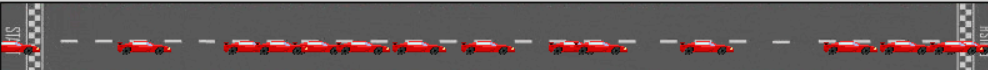

### **Density each on the interval x80 and x90**

In [10]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

print(v_car)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

### **Maximum density per unit time per 5 unit positions**

In [11]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

print(interval)


[3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 4, 3, 3, 3, 3, 3, 3]


### **Average time the car returns to its initial position**

In [36]:
# Copyright 2022, Taufiqurrahman, Fauzi Arya Surya Abadi and Yusril Ramadhan 

sumAvg = 0
for time in range(N):
    avg = t_car[time]/n_Round[time]
    print('Average Time of Car#{0} is {1:.2f} Unit of Time'.format(time+1, avg))
    sumAvg += avg

print('\nTotal Average Time All Cars Return to Starting Position is {0:.2f} Unit of Time'.format(sumAvg/N))


Average Time of Car#1 is 377.50 Unit of Time
Average Time of Car#2 is 722.50 Unit of Time
Average Time of Car#3 is 755.00 Unit of Time
Average Time of Car#4 is 483.00 Unit of Time
Average Time of Car#5 is 741.09 Unit of Time
Average Time of Car#6 is 659.89 Unit of Time
Average Time of Car#7 is 594.00 Unit of Time
Average Time of Car#8 is 657.50 Unit of Time
Average Time of Car#9 is 664.00 Unit of Time
Average Time of Car#10 is 609.58 Unit of Time
Average Time of Car#11 is 720.13 Unit of Time
Average Time of Car#12 is 531.12 Unit of Time
Average Time of Car#13 is 703.95 Unit of Time
Average Time of Car#14 is 661.17 Unit of Time
Average Time of Car#15 is 693.41 Unit of Time
Average Time of Car#16 is 580.93 Unit of Time
Average Time of Car#17 is 560.90 Unit of Time
Average Time of Car#18 is 470.60 Unit of Time
Average Time of Car#19 is 670.68 Unit of Time
Average Time of Car#20 is 685.71 Unit of Time

Total Average Time All Cars Return to Starting Position is 627.13 Unit of Time


---
## **References**

- https://alg.manifoldapp.org/read/science-of-everyday-materials-4-4-2022/section/3bc8e64b-ec55-410c-b40b-265c93232f53
- https://towardsdatascience.com/traffic-jam-science-and-visualization-54f79ed006f1
- https://drive.google.com/drive/folders/1MrCf_5VHjTSrHkcEMBjQZBw5NSxlAR5E?usp=sharing 
- https://docs.google.com/document/d/1bcfEv7_T0halb7NI6UT9-Jn3O6X-B3mosF7404JK_A0/edit
- https://github.com/rheum/NaSchSim
- https://www.freecodecamp.org/news/how-to-make-racing-game-using-python/
- https://www.lowgif.com/8f5a48839e61c7c7.html
- PDF Tugas Pemodelan dan Simulasi - Simulasi untuk Trafic Flow - June 7, 2022 (Telkom University)

<br> ***This Notebook Created by:*** <br>
*Dio Aditya Putra W.*